# **Model to predict retail profit using pricing, discount, sales volume, and regional features**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("Nike_Sales_Uncleaned.csv")
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [ ]:
df.shape
df.isnull().sum()

,0
Order_ID,0
Gender_Category,0
Product_Line,0
Product_Name,0
Size,510
Units_Sold,1235
MRP,1254
Discount_Applied,1668
Revenue,0
Order_Date,616


In [ ]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

**Select** Features and Target

In [ ]:
X = df_encoded[['MRP', 'Discount_Applied', 'Units_Sold', 'Region', 'Sales_Channel']]
y = df_encoded['Profit']

**Handle Missing Values**

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

X = X.dropna()
y = y.loc[X.index]

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

**Model evaluation metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1403.5658523809523
MSE: 2505280.6880844035
RMSE: 1582.8078493880435
R2 Score: -0.22373804250557217


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
1,Discount_Applied,0.359368
0,MRP,0.341755
3,Region,0.143405
2,Units_Sold,0.121576
4,Sales_Channel,0.033897


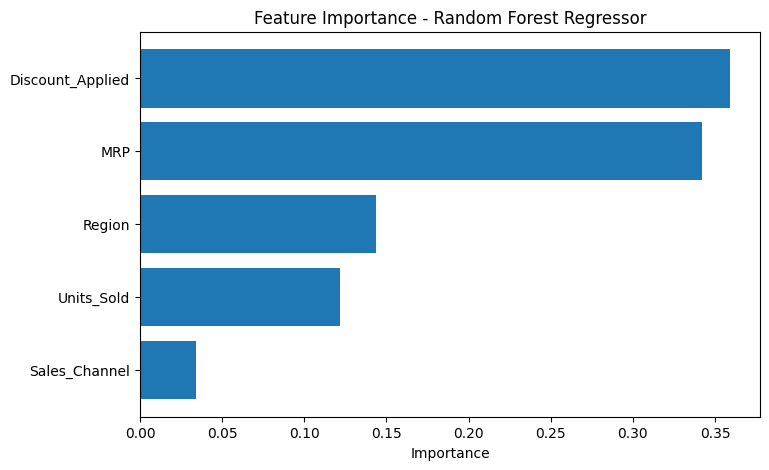

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest Regressor")
plt.gca().invert_yaxis()
plt.show()